### **15. Feature Detection**
   - **SIFT (Scale-Invariant Feature Transform):**
     - Detect and describe local features invariant to scale and rotation.
   
   - **HOG (Histogram of Oriented Gradients):**
     - Feature extraction based on gradient orientation, useful in object detection.
   
   - **ORB (Oriented FAST and Rotated BRIEF):**
     - Efficient, rotation-invariant alternative to SIFT, designed for real-time performance.

### **Key Methods in Feature Detection**  
#### **SIFT** (Scale-Invariant Feature Transform)
   - Keypoint detection and descriptor extraction for robust feature matching.
   - `cv2.SIFT_create()`  
#### **HOG** (Histogram of Oriented Gradients)
   - Compute gradients and orientations for object detection.
   - `cv2.HOGDescriptor()`
#### **ORB** (Oriented FAST and Rotated BRIEF)
   - Fast, scale, and rotation-invariant feature detection.
   - `cv2.ORB_create()`

Here’s a concise overview and some sample code for **SIFT**, **HOG**, and **ORB** to help you practice and apply feature detection methods effectively.

---

## **1. SIFT (Scale-Invariant Feature Transform)**  
**Use Case:**  
Detects keypoints and extracts descriptors that are invariant to scale and rotation, making it effective for matching under various transformations.

**Code:**
```python
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('input_image.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(img, None)

# Draw keypoints on the image
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image
plt.imshow(img_with_keypoints, cmap='gray')
plt.title("SIFT Keypoints")
plt.show()
```

---

## **2. HOG (Histogram of Oriented Gradients)**  
**Use Case:**  
Primarily used for object detection tasks (e.g., pedestrian detection) by computing gradient directions and magnitudes.

**Code:**
```python
import cv2

# Initialize HOG descriptor and set SVM detector (for pedestrian detection)
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Read the image
img = cv2.imread('input_image.jpg')

# Detect pedestrians (returns bounding boxes)
boxes, _ = hog.detectMultiScale(img, winStride=(8, 8), padding=(8, 8), scale=1.05)

# Draw bounding boxes around detected objects
for (x, y, w, h) in boxes:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
cv2.imshow("HOG Detection", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

---

## **3. ORB (Oriented FAST and Rotated BRIEF)**  
**Use Case:**  
A fast, lightweight alternative to SIFT, suitable for real-time applications like mobile/edge devices.

**Code:**
```python
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('input_image.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(img, None)

# Draw keypoints
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=0)

# Display the result
plt.imshow(img_with_keypoints, cmap='gray')
plt.title("ORB Keypoints")
plt.show()
```

---

## **Comparison of Feature Detection Methods:**
| **Method** | **Invariance** | **Speed** | **Use Case** |
|-------------|----------------|-----------|--------------|
| **SIFT**    | Scale, Rotation | Slower   | Precise matching and recognition |
| **HOG**     | Not scale-invariant | Fast | Object detection (e.g., pedestrians) |
| **ORB**     | Scale, Rotation | Faster   | Real-time applications |

---

This should help you practice feature detection in OpenCV and better understand the trade-offs between these algorithms. Let me know if you'd like additional examples or guidance!

In [1]:
!pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.8 MB 6.3 MB/s eta 0:00:02
   -------- ------------------------------- 1.6/7.8 MB 5.2 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/7.8 MB 3.6 MB/s eta 0:00:02
   ------------ --------------------------- 2.4/7.8 MB 3.3 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/7.8 MB 2.9 MB/s eta 0:00:02
   ---------------- ----------------------- 3.1/7.8 MB 2.3 MB/s eta 0:00:03
   ----------------- ---------------------- 3.4/7.8 MB 2.2 MB/s eta 0:00:03
   ------------------ --------------------- 3.7/7.8 MB 2.3 MB/s eta 0:00:02
   --------------------- ------------------ 4.2/7.8 MB 2.1 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/7.8 MB 2.1 MB/s eta 0:00:02
   ------------------------ --------------- 4.7/7.8 MB 2.0 MB/s eta 0:00:02
   -------------------------- ------------- 5.2/7.8 MB 2.0 MB/s eta 0:00:02
   ----------------

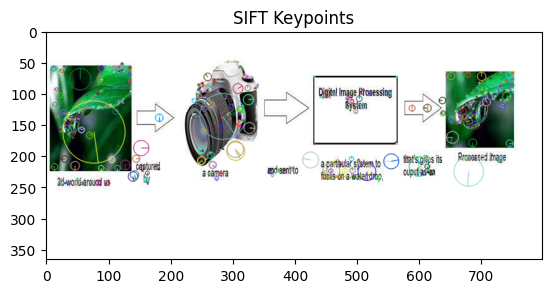

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load an image
img = cv2.imread('downloaded_image.jpg')

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints
keypoints, descriptors = sift.detectAndCompute(img, None)

# Draw keypoints
img_with_keypoints = cv2.drawKeypoints(
    img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Display the image with keypoints
plt.imshow(img_with_keypoints, cmap='gray')
plt.title("SIFT Keypoints")
plt.show()


### **How SIFT Detects Keypoints and Extracts Descriptors**  

The **SIFT (Scale-Invariant Feature Transform)** algorithm, introduced by David Lowe, performs two major tasks:  
1. **Keypoint Detection** (finding interesting points invariant to scale and rotation)  
2. **Descriptor Extraction** (creating a unique vector representing the keypoint for matching across images)  

Let’s break these steps down:

---

## **Step 1: Keypoint Detection in SIFT**

SIFT detects **keypoints** by identifying points of high contrast (corners, edges, blobs) across different **scales**. Here's how:

1. **Scale-Space Construction**  
   - The goal is to detect keypoints at different scales.  
   - SIFT creates multiple **blurred versions** of the image by applying **Gaussian filters** with different levels of blurring (scale levels).
   - For each scale, it subtracts two consecutive blurred images to form a **Difference of Gaussian (DoG)** image, which highlights areas where intensity changes the most (like edges and corners).

   **Formula:**  
   \( D(x, y, \sigma) = L(x, y, k\sigma) - L(x, y, \sigma) \)  
   Where:
   - \( D(x, y, \sigma) \): Difference of Gaussian image.
   - \( L(x, y, \sigma) \): Gaussian-blurred image.
   - \( k \): Scale factor.

2. **Finding Local Extrema**  
   - Each pixel in the DoG image is compared with its 26 neighbors (8 in the same image, and 18 from adjacent scales).  
   - If the pixel’s value is either the **maximum or minimum** among its neighbors, it is identified as a **candidate keypoint**.

3. **Filtering Unstable Keypoints**  
   - **Edge-like points** (where gradients are high but not distinctive) and **low-contrast keypoints** are discarded to improve stability.

4. **Assigning Orientation**  
   - For each keypoint, a **gradient orientation histogram** is created based on the surrounding pixel gradients.  
   - The **dominant orientation** is assigned to the keypoint, making it rotation-invariant.

---

## **Step 2: Descriptor Extraction in SIFT**  

Once the keypoints are detected, **descriptors** are generated to uniquely represent the region around each keypoint. These descriptors help in matching keypoints between different images.

1. **Extracting Gradient Information around Keypoints**  
   - A **16x16 neighborhood** around each keypoint is considered.
   - This region is divided into **4x4 sub-regions** (each sub-region is 4x4 pixels).

2. **Computing Orientation Histogram for Each Sub-region**  
   - For each sub-region, gradients are computed in **8 orientation bins** (e.g., 0°, 45°, 90°, etc.).
   - This gives a **4x4x8 = 128-dimensional vector** for each keypoint (4x4 sub-regions and 8 orientation bins per region).

3. **Normalizing the Descriptor**  
   - The 128-dimensional vector is normalized to make it invariant to changes in lighting and contrast.

---

## **Visual Representation of Keypoint Detection and Descriptor Extraction**  
Each keypoint can be visualized with a **circle** representing its scale, and an **arrow** representing its orientation.

---

## **Code Example: Detecting Keypoints and Extracting Descriptors with SIFT**

```python
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread('input_image.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and extract descriptors
keypoints, descriptors = sift.detectAndCompute(img, None)

# Print the number of keypoints and descriptor shape
print(f"Number of Keypoints Detected: {len(keypoints)}")
print(f"Descriptor Shape: {descriptors.shape}")

# Draw the keypoints on the image
img_with_keypoints = cv2.drawKeypoints(
    img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Display the image with keypoints
plt.imshow(img_with_keypoints, cmap='gray')
plt.title("SIFT Keypoints")
plt.show()
```

---

## **Summary of Key Processes in SIFT**
- **Keypoint Detection:**  
  - Uses **Difference of Gaussian** to find potential keypoints.
  - Compares pixel intensities across scales and selects local maxima or minima.
  - Filters out unstable keypoints and assigns an **orientation** to each keypoint.

- **Descriptor Extraction:**  
  - Computes gradients around the keypoint.
  - Divides the neighborhood into 4x4 sub-regions, with 8 orientation bins per sub-region.
  - Creates a **128-dimensional descriptor vector** for matching.

---

## **Advantages of SIFT**  
- **Scale and Rotation Invariant:** Works well for images with different sizes and orientations.  
- **Robust Descriptors:** Performs well even with partial occlusion or illumination changes.  
- **Effective Matching:** Descriptors can be compared across images to identify similar objects.

This detailed pipeline explains how **SIFT** finds keypoints and generates descriptors to facilitate feature matching across images! Let me know if anything is unclear or if you need further help.

why they using pixel gradient ?
based on pixel gradient we can calculate the intensity changes with respect to its neighbours.so,using this pixel gradient we can find that pixel is unique or not by pixel gradient value .if pixel gradient is high then we can say the particular point is unique else its not.so,using this we can find key points.(corners,edges,...)


Sure! Let’s break down **HOG (Histogram of Oriented Gradients)** in **simple terms**, step by step. Think of it like this: the goal is to **describe the shape of an object** (e.g., a human) by checking how pixel brightness changes (gradients) and which directions those changes point to (orientation). 

---

### **Steps of HOG Simplified**  

1. **Divide the image into small blocks of pixels.**  
2. **Check how the pixel brightness changes (gradients).**  
3. **Group similar gradient directions into bins (histograms).**  
4. **Normalize these values to handle lighting changes.**  
5. **Combine all blocks into one big feature vector to describe the object.**  

---

Let’s go step-by-step with a **simple analogy** to make it clearer!

---

### **Step 1: Divide the Image into Cells**  
- Imagine the image as a **chessboard**. 
- Each small square on the board is called a **cell** (e.g., 8x8 pixels).
- We will look at each of these cells **one by one** to check how the brightness changes inside.

---

### **Step 2: Calculate Gradients (Brightness Changes)**  
- Inside each **cell**, check how the brightness changes from one pixel to another (in **horizontal and vertical directions**).  
- If the pixel's brightness changes a lot, it means there’s an **edge** there (like part of a shape or boundary).

**Example:**  
If the brightness changes sharply along the side of a person’s leg, we detect that **edge** using gradients.

---

### **Step 3: Group Gradient Directions (Histogram of Directions)**  
- For each **cell**, we look at the direction of these changes (called **orientations**).  
  Example directions:  
  - **0°** (right), **45°** (diagonal), **90°** (up), and so on.

- Now, we create a **histogram** that says:
  - **"How many edges point right?" (0°)**  
  - **"How many edges point diagonal?" (45°)**  
  - And so on...

This histogram describes the **shape** of the object inside that cell.

---

### **Step 4: Normalize the Histograms (Handle Lighting Differences)**  
- Brightness can vary between images (e.g., day vs. night). To make sure the values are **consistent**, we normalize the histograms.  
- This step ensures that even if the lighting is different, we can still recognize the same object.

---

### **Step 5: Combine All Cells to Create a Feature Vector**  
- Now that each **cell** describes part of the object, we **combine all the cells** to create a long feature vector.
- This feature vector represents the **entire object** (e.g., the shape of a person).  
- We can use this feature vector to **train a model (like SVM)** to detect the object.

---

### **Summary of HOG in a Nutshell**  
- **Divide** the image into small cells.  
- **Check how brightness changes** in each cell (gradients).  
- **Group the directions** of these changes into a histogram.  
- **Normalize** the histograms to ignore lighting effects.  
- **Combine everything** to get a feature vector describing the object.

---

### **Why HOG Works Well for Pedestrian Detection?**  
HOG works well because people have a distinctive **shape** (e.g., legs, arms), and these shapes create **specific gradients**. Even if the person is partially rotated or the lighting changes, HOG captures their overall shape accurately.

---

Let me know if that makes more sense! 😊

**ORB (Oriented FAST and Rotated BRIEF)** is a feature detection and description algorithm used in computer vision. It is designed to be efficient and fast while still providing robust performance for various tasks, such as object recognition and image matching. Here’s a detailed look at ORB, including its key components, advantages, and how it works.

### **Key Features of ORB**

1. **Keypoint Detection:**
   - ORB uses the **FAST (Features from Accelerated Segment Test)** algorithm for detecting keypoints. FAST is known for its speed and efficiency in identifying corners or interest points in images.
   - It detects keypoints based on the intensity of pixels in a circular neighborhood around a pixel. If the pixel intensity is significantly different from its neighbors, it is considered a keypoint.

2. **Orientation Assignment:**
   - After detecting keypoints, ORB computes the **dominant orientation** of each keypoint based on the pixel gradients in its neighborhood. This orientation helps make the descriptors invariant to rotation, meaning that the keypoints can be matched even if the object is rotated.

3. **Descriptor Extraction:**
   - ORB uses the **BRIEF (Binary Robust Invariant Scalable Keypoints)** descriptor, but it improves it by making it rotation-invariant.
   - The descriptors are generated based on the intensity comparisons of pixel pairs around the keypoint, creating a binary string that represents the keypoint's features.

4. **Multi-Scale Feature Detection:**
   - ORB operates at multiple scales to capture features from images at different resolutions. This allows it to detect both small and large features effectively.

### **Advantages of ORB**

- **Speed:** ORB is designed to be very fast, making it suitable for real-time applications, such as mobile devices and embedded systems.
- **Rotation-Invariance:** By assigning an orientation to each keypoint, ORB can match keypoints regardless of their rotation in the image.
- **Binary Descriptors:** The use of binary descriptors (as opposed to floating-point descriptors used in SIFT or SURF) allows for faster matching, as binary comparisons are computationally less intensive.
- **Open Source:** ORB is available in the OpenCV library, making it accessible for developers and researchers.

### **How ORB Works: Step-by-Step**

1. **Keypoint Detection:**
   - Use the FAST algorithm to detect corners in the image.
   - Determine which corners are suitable keypoints based on a threshold (usually set for the number of pixels needed to classify a point as a corner).

2. **Orientation Assignment:**
   - Calculate the image gradients around each keypoint to determine its orientation.
   - This orientation is assigned to the keypoint to ensure that the descriptor will remain invariant to rotation.

3. **Descriptor Extraction:**
   - For each keypoint, extract a binary descriptor using the BRIEF method.
   - The descriptor is created by comparing the intensities of pairs of pixels in a circular neighborhood around the keypoint.

4. **Keypoint Matching:**
   - Once keypoints and descriptors are extracted, you can use methods like **Hamming distance** to match descriptors between images.
   - Use a matching algorithm (like the FLANN or brute force) to find the best matches.

### **Example Code Using OpenCV**

Here’s a simple example of how to use ORB in Python with OpenCV:

```python
import cv2

# Load the image
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(image, None)

# Draw keypoints on the image
output_image = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the output image
cv2.imshow('ORB Keypoints', output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

### **Use Cases of ORB**

- **Object Recognition:** Identifying objects in images and matching them against a database.
- **Image Stitching:** Combining multiple images into a panorama by aligning them based on keypoints.
- **Augmented Reality:** Overlaying virtual objects on real-world images using detected features.
- **Robotics:** Assisting robots in navigating and understanding their environment through visual input.

### **Summary**

- ORB is a fast and efficient feature detection and description algorithm that provides rotation-invariant keypoints and binary descriptors.
- It is widely used in various computer vision applications due to its speed and robustness.

If you have any specific questions or need further clarification on any part of ORB, feel free to ask!

**SURF (Speeded Up Robust Features)** and **SIFT (Scale-Invariant Feature Transform)** are both feature detection and description algorithms used in computer vision, but they have some key differences in terms of their design, performance, and specific characteristics. Here's a comparison of the two:

### **Key Similarities**

1. **Purpose:**
   - Both algorithms are used to detect and describe local features in images, making them useful for tasks like object recognition, image matching, and 3D reconstruction.

2. **Scale and Rotation Invariance:**
   - Both SIFT and SURF are designed to be invariant to scale (size) and rotation, which means they can recognize the same feature even if the image is resized or rotated.

3. **Keypoint Detection and Descriptor Extraction:**
   - Both algorithms detect keypoints in an image and then compute descriptors that represent the local image information around those keypoints.

### **Key Differences**

1. **Algorithm Design:**
   - **SIFT:**
     - Uses the Difference of Gaussian (DoG) to identify keypoints. It processes the image at multiple scales to find points that are stable across different resolutions.
     - The descriptor is based on the gradient information around each keypoint, typically represented using a histogram of orientations.

   - **SURF:**
     - Uses the Hessian matrix to identify keypoints, which allows for faster detection. It approximates the Gaussian filter using box filters, speeding up the computations.
     - The descriptor is computed from the distribution of gradient orientations in the vicinity of each keypoint.

2. **Speed:**
   - **SIFT:**
     - Generally slower compared to SURF due to the complex calculations involved in the Difference of Gaussian and descriptor extraction.

   - **SURF:**
     - Designed for speed and efficiency. It performs faster than SIFT, making it suitable for real-time applications.

3. **Robustness:**
   - **SIFT:**
     - Often considered more robust in challenging conditions, such as varying illumination and perspective changes.

   - **SURF:**
     - Although robust, it may not perform as well as SIFT in extremely challenging conditions.

4. **Patent Issues:**
   - **SIFT:**
     - SIFT was patented, which restricted its use in commercial applications until the patent expired in 2020.

   - **SURF:**
     - SURF is also subject to patent restrictions, which means it could have limitations in certain applications depending on licensing.

5. **Descriptor Size:**
   - **SIFT:**
     - Produces a 128-dimensional descriptor for each keypoint.

   - **SURF:**
     - Typically produces a 64-dimensional descriptor (or 128-dimensional in a refined version).

### **Summary**

- **SIFT** is more robust and detailed, making it suitable for applications requiring high accuracy in challenging conditions. However, it is generally slower.
- **SURF** is faster and efficient, making it suitable for real-time applications, but it may be less robust in some scenarios.

In choosing between SIFT and SURF, the decision often depends on the specific requirements of the application, such as the need for speed versus robustness. If you have any more questions or need further details, feel free to ask!

Here’s a comparison of SIFT, SURF, HOG, and ORB in a table format, highlighting their key differences:

| **Feature**                | **SIFT (Scale-Invariant Feature Transform)** | **SURF (Speeded Up Robust Features)** | **HOG (Histogram of Oriented Gradients)** | **ORB (Oriented FAST and Rotated BRIEF)** |
|----------------------------|---------------------------------------------|---------------------------------------|---------------------------------------------|-------------------------------------------|
| **Key Purpose**            | Feature detection and description           | Feature detection and description     | Object detection based on gradients         | Feature detection and description         |
| **Keypoint Detection**     | Difference of Gaussian (DoG)                | Hessian matrix                       | Soble kernels (focuses on gradients)      | FAST (Features from Accelerated Segment Test) |
| **Descriptor**             | 128-dimensional vector based on gradients(floating point)  | 64 or 128-dimensional vector based on gradients | Histogram of gradient orientations       | 256-dimensional vector (binary descriptor) |
| **Scale Invariance**       | Yes                                         | Yes                                   | Yes                                         | Yes                                       |
| **Rotation Invariance**    | Yes                                         | Yes                                   | Yes                                         | Yes                                       |
| **Speed**                  | Slower compared to SURF and ORB            | Faster than SIFT                      | Fast (designed for efficiency)             | Very fast (optimized for real-time use)  |
| **Computational Complexity**| High (due to DoG)                          | Medium (Hessian matrix)              | Low (gradient-based)                        | Low (efficient binary descriptor)         |
| **Robustness**             | Very robust in varying conditions           | Good robustness                       | Moderate robustness (depends on object shape) | Good robustness but less than SIFT/SURF |
| **Descriptor Type**        | Floating-point values                       | Floating-point values                 | Histogram of counts                         | Binary values                             |
| **Applications**           | Object recognition, image stitching, etc.   | Object recognition, 3D reconstruction | Pedestrian detection, object recognition    | Object recognition, image matching        |
| **Patent Status**          | Patent expired (2020)                      | Patent (limited commercial use)      | No patent issues                           | No patent issues                          |

### Summary of Each Method:

- **SIFT**: Great for detailed feature matching in various conditions but slower and has higher computational complexity.
  
- **SURF**: Similar to SIFT but optimized for speed; good for real-time applications with decent robustness.

- **HOG**: Primarily used for object detection by analyzing gradients and orientations, not focused on keypoint detection.

- **ORB**: A fast and efficient feature detection algorithm that provides binary descriptors, suitable for applications requiring real-time performance.

This table should help you compare the different feature detection and description methods at a glance. If you have any more questions or need further details on any specific method, feel free to ask!